# Bikes & Cycling Accessories Organisation's Transactions Data Based Cohort Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt




# Step 1. Import data & quick look to dataset

In [2]:
cus_demo = pd.read_excel('Project 1_ KPMG_VI_New_raw_data_update_final.xlsx', 'CustomerDemographic')
trans = pd.read_excel('Project 1_ KPMG_VI_New_raw_data_update_final.xlsx', 'Transactions')
cus_add = pd.read_excel('Project 1_ KPMG_VI_New_raw_data_update_final.xlsx', 'CustomerAddress')


/var/folders/85/jcyy_w7d4g5cdzprsfn0tngh0000gn/T/ipykernel_10820/178838265.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  cus_demo = pd.read_excel('Project 1_ KPMG_VI_New_raw_data_update_final.xlsx', 'CustomerDemographic')


In [3]:
cus_demo.head()


,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34.0,Jephthah Bachmann,U,59.0,1843-12-21,#NUM!,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144.0,Jory Barrabeale,U,71.0,NaT,125,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168.0,Reggie Broggetti,U,8.0,NaT,125,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267.0,Edgar Buckler,U,53.0,NaT,125,NaN,IT,High Net Worth,N,No,NaN
4,290.0,Giorgio Kevane,U,42.0,NaT,125,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [4]:
#将columns列需要从第0行移上去
#reset index 确保index正确
trans.columns = trans.iloc[0]
trans = trans[1:].reset_index(drop = True)
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1.0,2.0,2950.0,25/02/2024,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2.0,3.0,3120.0,21/05/2024,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3.0,37.0,402.0,16/10/2024,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4.0,88.0,3135.0,31/08/2024,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145.0
4,5.0,78.0,787.0,2024-01-10 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226.0


In [5]:
#same as above
cus_add.columns = cus_add.iloc[0]
cus_add = cus_add[1:].reset_index(drop = True)
cus_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,4.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
3,5.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0
4,6.0,9 Oakridge Court,3216.0,VIC,Australia,9.0




# Step 2. Summary of statistics, data clean and basic info about data

# Table 1. Cus_demo

In [6]:
cus_demo.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34.0,Jephthah Bachmann,U,59.0,1843-12-21,#NUM!,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144.0,Jory Barrabeale,U,71.0,NaT,125,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168.0,Reggie Broggetti,U,8.0,NaT,125,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267.0,Edgar Buckler,U,53.0,NaT,125,NaN,IT,High Net Worth,N,No,NaN
4,290.0,Giorgio Kevane,U,42.0,NaT,125,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [7]:
cus_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   float64       
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   float64       
 4   DOB                                  3913 non-null   datetime64[ns]
 5   age                                  4000 non-null   object        
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [8]:
cus_demo.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [9]:
# check missing value
cus_demo1 = cus_demo.replace("", np.NaN)

# cus_demo = cus_demo.fillna()
print(cus_demo1.isnull().sum())

customer_id                              0
name                                     0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
age                                      0
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64


In [10]:
cus_demo1.dtypes

customer_id                                   float64
name                                           object
gender                                         object
past_3_years_bike_related_purchases           float64
DOB                                    datetime64[ns]
age                                            object
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                        float64
dtype: object

<AxesSubplot:>

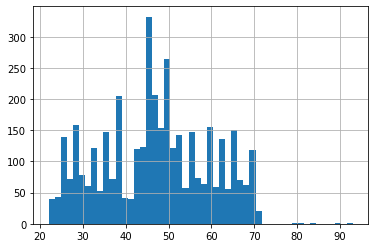

In [11]:
# 发现当DOB为空时，age自动为125, 且有一行age为#NUM!,该行对应的生日为1843，这是不可能的，因此全部替换成NaN


cus_demo1['age'] = cus_demo1['age'].replace('#NUM!', np.NaN)
cus_demo1['age'] = cus_demo1['age'].replace(125, np.NaN)

cus_demo1['age'].hist(bins = 50)

# 通过histgram来看，数据分布有些右偏（right-skewed distribution）
# 因此将这些不对的age替换成median(age) 

<AxesSubplot:>

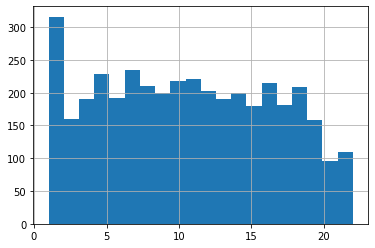

In [12]:
cus_demo1['tenure'].hist(bins = 20)

In [13]:
# data clean: cat--fill众数, num -- fill mean/median

# for col in cus_demo.columns:
#     if cus_demo[col].dtypes == 'object':
#         cus_demo[col] = cus_demo[col].fillna(cus_demo[col].value_counts().index[0])
#     if cus_demo[col].dtypes == 'float':
#         if col == 'age':
#             cus_demo[col] = cus_demo[col].fillna(cus_demo[col].median())
#         else:
#             cus_demo[col] = cus_demo[col].fillna(cus_demo[col].mean())


In [14]:
#age
cus_demo1['age'] = cus_demo1['age'].fillna(cus_demo1['age'].median())

In [15]:
#gender: U fill mode众数 
gender_most = cus_demo1['gender'].value_counts().index[0]
cus_demo1['gender'] = cus_demo1['gender'].replace('U',gender_most)

In [16]:
#DOB useless
del cus_demo1['DOB']

In [17]:
#tenure fill mean
cus_demo1['tenure'] = cus_demo1['tenure'].fillna(cus_demo1['tenure'].mean())

In [18]:
#job_cat & job title
#job_industry_category缺失时，jobtitle是有的
cus_demo1[cus_demo1['job_industry_category'].isnull()]['job_title'].value_counts()

#mostly IT

Recruiting Manager                      13
Business Systems Development Analyst    12
VP Product Management                   11
Physical Therapy Assistant              10
General Manager                         10
                                        ..
Safety Technician III                    1
Office Assistant IV                      1
Computer Systems Analyst II              1
Software Engineer I                      1
Web Developer III                        1
Name: job_title, Length: 143, dtype: int64

In [19]:
cus_demo1['job_industry_category'] = cus_demo1['job_industry_category'].replace(np.NaN, 'IT')

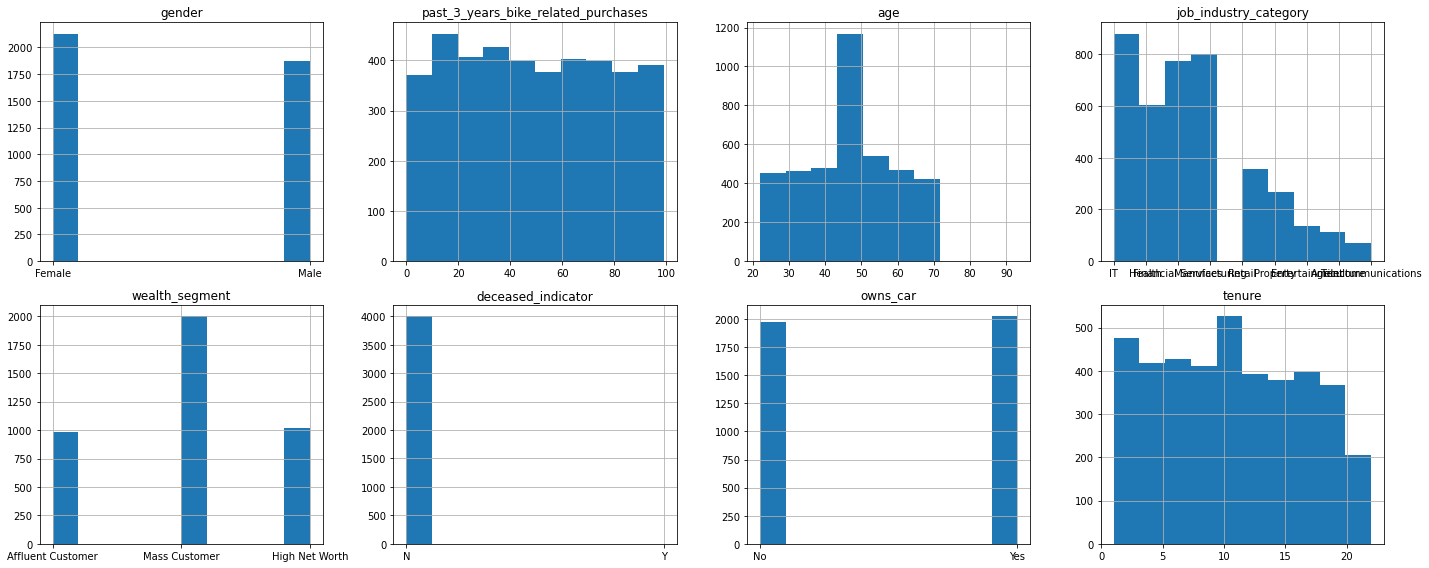

In [20]:
l1 = ['gender', 'past_3_years_bike_related_purchases', 'age', 'job_industry_category','wealth_segment','deceased_indicator','owns_car','tenure']

fig,axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20,8))

for i in range(8):
    if i < 4:
        cus_demo1[l1[i]].hist(ax = axes[0,i])
        axes[0,i].set_title(f'{l1[i]}')
    else:
        cus_demo1[l1[i]].hist(ax = axes[1,i-4])
        axes[1,i-4].set_title(f'{l1[i]}')
        
    

plt.tight_layout()
plt.show()

In [21]:
cus_demo1['job_industry_category'].value_counts()

IT                    879
Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
Entertainment         136
Agriculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

首先从图里面可以看出,customer里，女性略多于男性，年龄主要集中在40-60岁之间，职业以IT, Manufacturing、Financial Services、Health居多，且以masscustomer居多，关于有没有车的问题，客户大概一半一半，tenure的话从1-22之间都有，平均在10年左右，较多的为1-3和9-12年。此外客户中，过去三年的购买记录平均在48.8次。

In [22]:
del cus_demo1['job_title']
cus_demo1.isnull().sum()

customer_id                            0
name                                   0
gender                                 0
past_3_years_bike_related_purchases    0
age                                    0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='past_3_years_bike_related_purchases'>

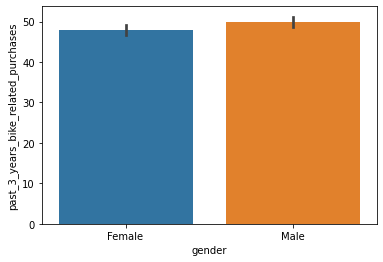

In [23]:
sns.barplot(x = 'gender', y = 'past_3_years_bike_related_purchases', data = cus_demo1, estimator = np.mean)

# 虽然女性客户多于男性，但男性客户相关购买会更多一些

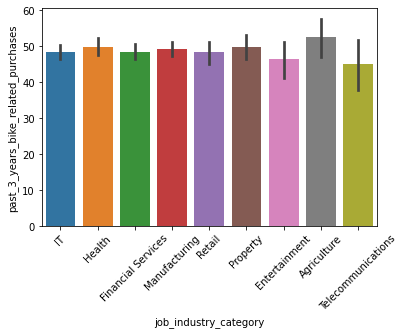

In [24]:
sns.barplot(x = 'job_industry_category', y = 'past_3_years_bike_related_purchases', data = cus_demo1, estimator = np.mean)
plt.xticks(rotation=45)

plt.show()

#虽然用户职业以Manufacturing、Financial Services、Health居多，但在过去3年相关的购买里从事农业的人的平均购买却是最多的

In [25]:
cus_demo1.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,age,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34.0,Jephthah Bachmann,Female,59.0,47.0,IT,Affluent Customer,N,No,20.000000
1,144.0,Jory Barrabeale,Female,71.0,47.0,IT,Mass Customer,N,No,10.657041
2,168.0,Reggie Broggetti,Female,8.0,47.0,IT,Affluent Customer,N,Yes,10.657041
3,267.0,Edgar Buckler,Female,53.0,47.0,IT,High Net Worth,N,No,10.657041
4,290.0,Giorgio Kevane,Female,42.0,47.0,IT,Mass Customer,N,No,10.657041


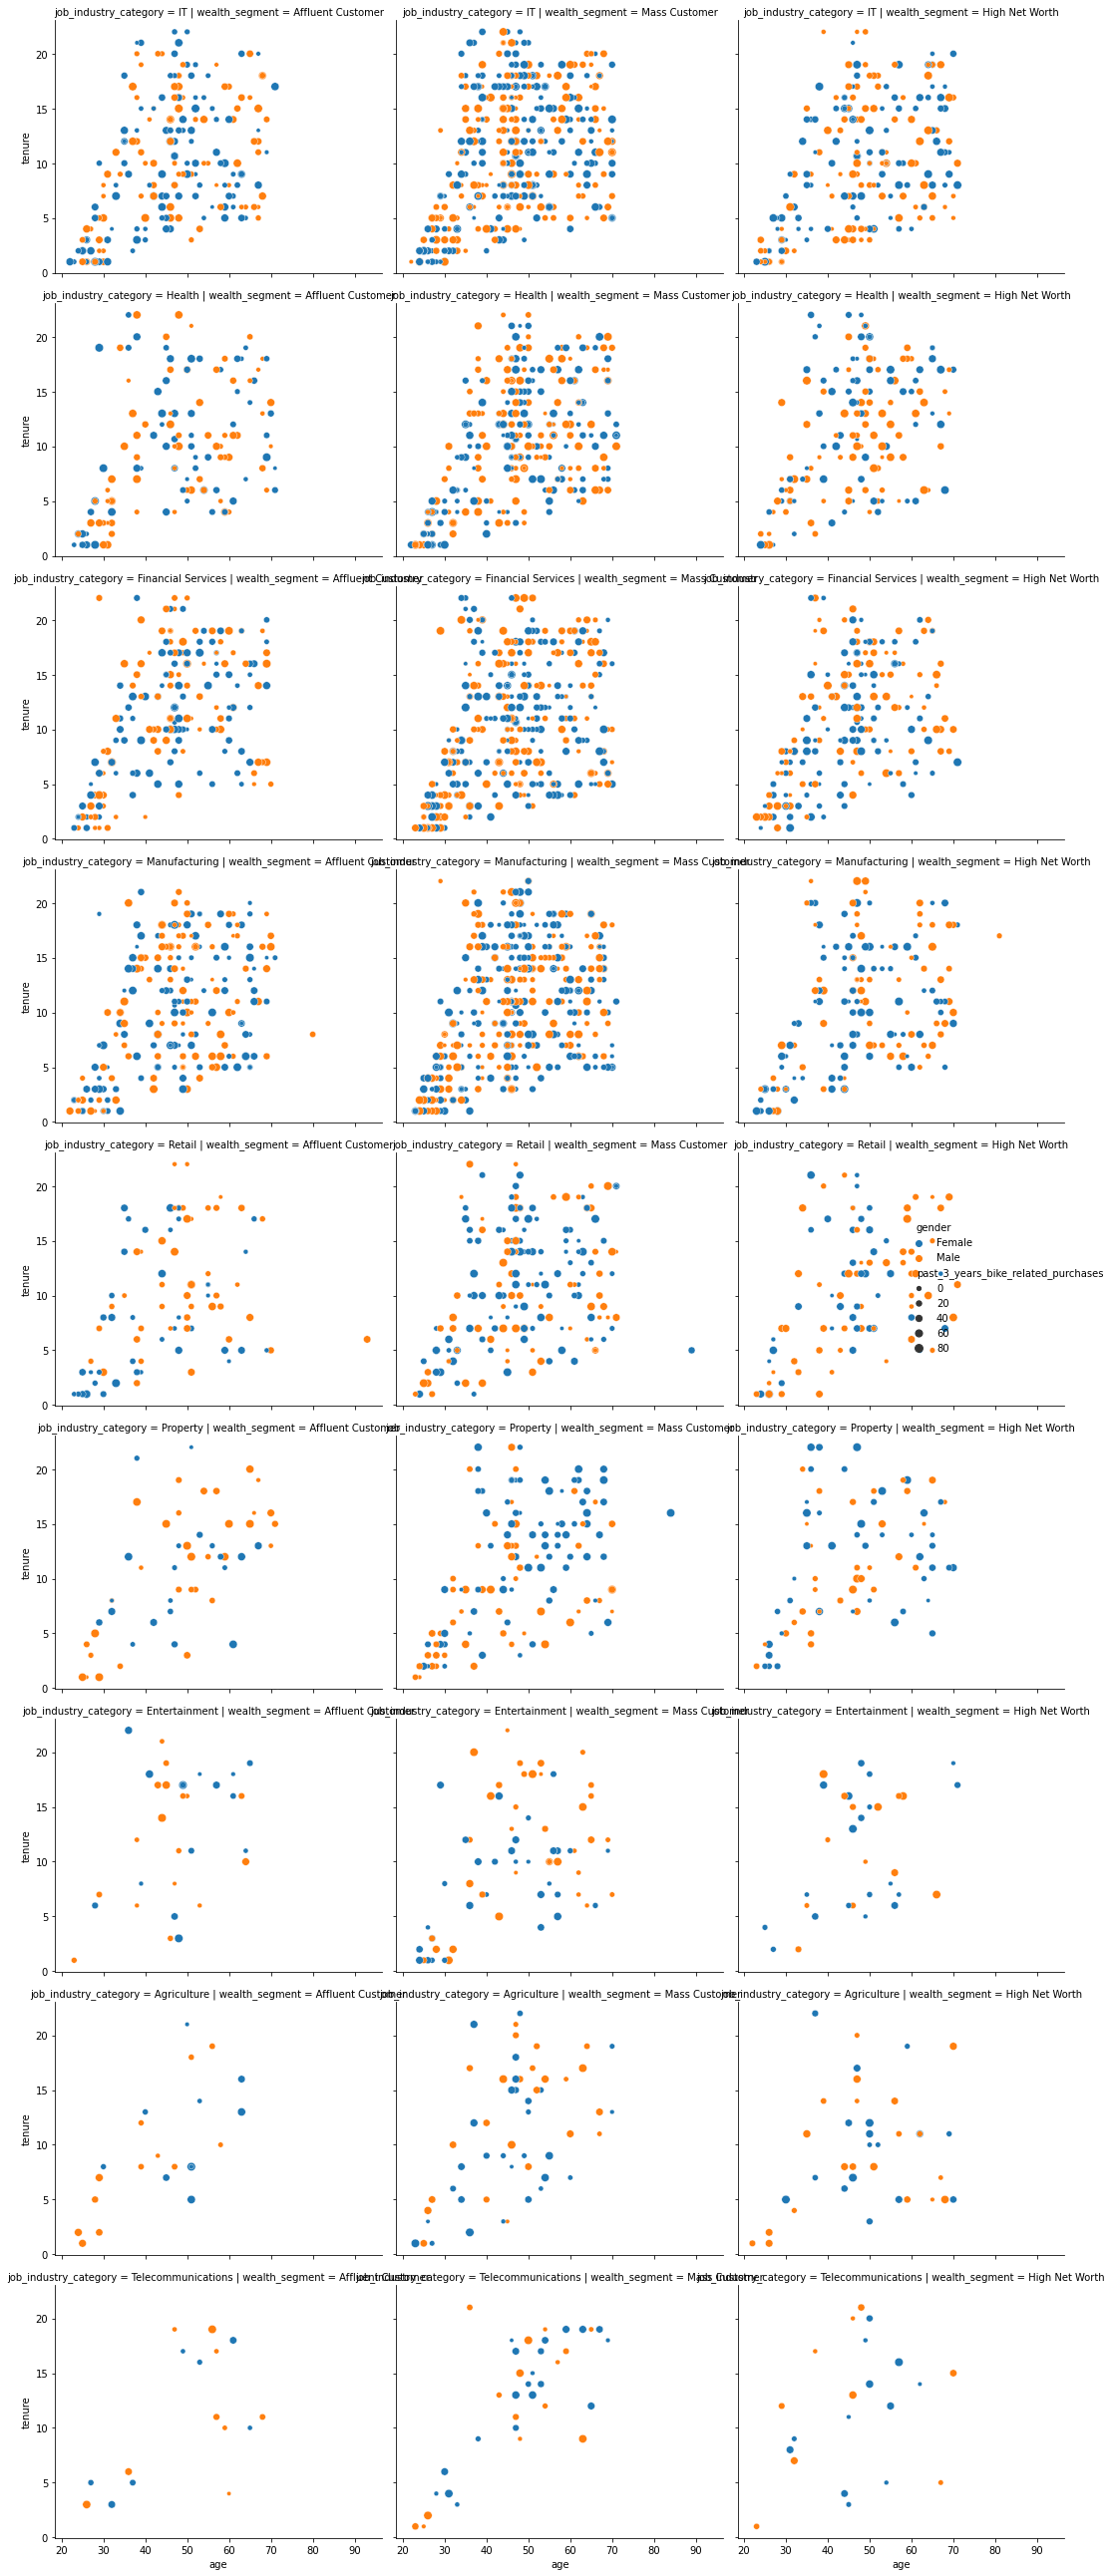

In [26]:
sns.color_palette('pastel')
ax = sns.relplot(data=cus_demo1, 
                 kind='scatter', 
                 x='age',
                 y='tenure',
                 hue='gender',
                 col='wealth_segment', 
#                  style='owns_car', 
                 size='past_3_years_bike_related_purchases', 
                 row='job_industry_category', 
                 height=4
                )

plt.tight_layout()
plt.show()

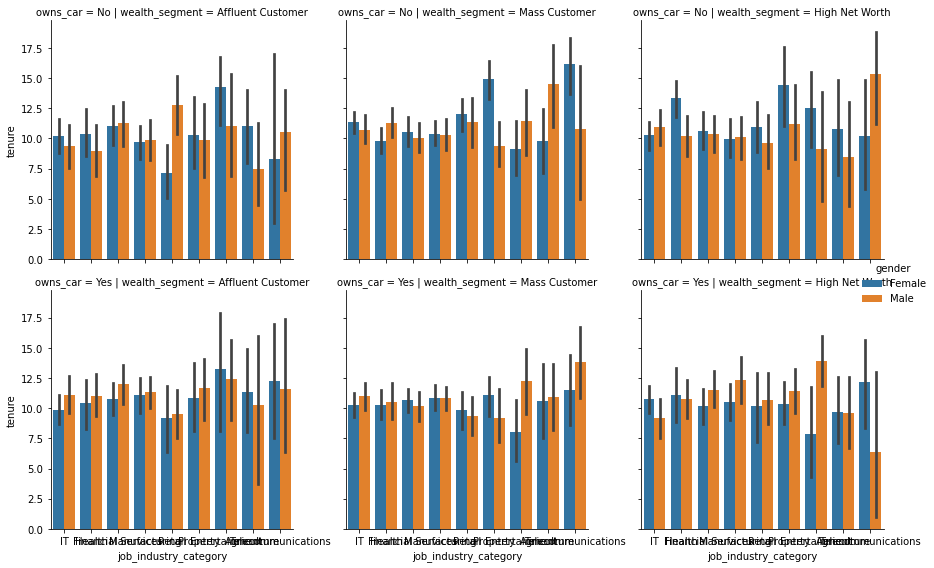

In [27]:
sns.color_palette('pastel')
ax = sns.catplot(data=cus_demo1, 
                 kind='bar', 
                 x='job_industry_category',
                 y='tenure',
                 hue='gender',
                 col='wealth_segment', 
#                  style='owns_car', 
#                  size='past_3_years_bike_related_purchases', 
                 row='owns_car', 
                 height=4
                )

plt.tight_layout()
plt.show()

从上图中可以看出来，
IT、health、financial\manufacturing职业的人，比较多为mass customer,各个年龄层和tenure的客户都有,
其中manufacturing的高净值客户相对年龄较大，新增的客户则主要为年轻女性为主
retail的客户中affludent customer也是，新增客户主要以年轻女性为主，老的客户则以年龄较大的男性为主，而高净值客户则以男性居多
#property的客户中，affluent新增和老客户主要都以男性为主，女性客户居中，mass customer中新增则主要为男性，老客户以女性为主
高净值以女性为主，男性居中
entertainment中，affluent新增客户较少
agriculture新增客户主要以女性为主


In [28]:
cus_demo1.dtypes

customer_id                            float64
name                                    object
gender                                  object
past_3_years_bike_related_purchases    float64
age                                    float64
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
owns_car                                object
tenure                                 float64
dtype: object

<AxesSubplot:>

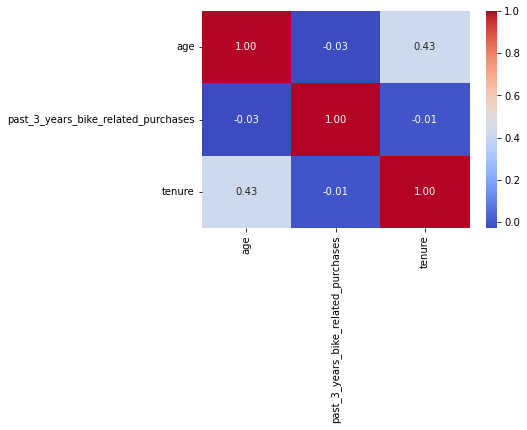

In [29]:
sns.heatmap(cus_demo1[['age','past_3_years_bike_related_purchases','tenure']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

#age and tenure have positive correlation w/ each other

# Table 2.Trans

In [30]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1.0,2.0,2950.0,25/02/2024,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2.0,3.0,3120.0,21/05/2024,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3.0,37.0,402.0,16/10/2024,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4.0,88.0,3135.0,31/08/2024,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145.0
4,5.0,78.0,787.0,2024-01-10 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226.0


In [31]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [32]:
trans.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.0,20000.0,20000.0,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803.0
unique,20000.0,101.0,3494.0,364,2,2,6,4,3,3,296.00,103.00,100.0
top,1.0,0.0,2183.0,14/02/2024,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879.0
freq,1.0,1378.0,14.0,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234.0


In [33]:
trans.isnull().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [34]:
trans_null = trans[trans['brand'].isnull()]
trans_null['product_id'].value_counts()

# 缺失的都是product id = 0

0.0    197
Name: product_id, dtype: int64

<AxesSubplot:>

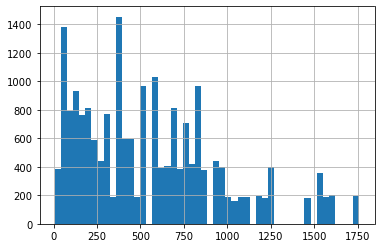

In [35]:
trans['standard_cost'].hist(bins = 50)
#数据右偏

<AxesSubplot:>

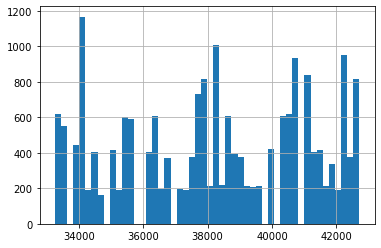

In [36]:
trans['product_first_sold_date'].hist(bins = 50)

In [37]:
# fill missing value
trans = trans.replace('',np.NaN)

# for col in trans.columns:
#     if trans[col].dtypes == 'float':
#         if col == 'standard_cost':
#             trans[col] = trans[col].fillna(trans[col].median())
#         else:
#             trans[col] = trans[col].fillna(trans[col].mean())
#     if trans[col].dtypes == 'object':
#         trans[col] = trans[col].fillna(trans[col].value_counts().index[0])

In [38]:
trans['online_order'] = trans['online_order'].fillna(trans['online_order'].value_counts().index[0])

In [39]:
trans['brand'] = trans['brand'].fillna(trans[trans['product_id']==0]['brand'].value_counts().index[0])
trans['product_line'] = trans['product_line'].fillna(trans[trans['product_id']==0]['product_line'].value_counts().index[0])
trans['product_class'] = trans['product_class'].fillna(trans[trans['product_id']==0]['product_class'].value_counts().index[0])
trans['product_size'] = trans['product_size'].fillna(trans[trans['product_id']==0]['product_size'].value_counts().index[0])

trans['product_first_sold_date'] = trans['product_first_sold_date'].fillna(trans[trans['product_id']==0]['product_first_sold_date'].value_counts().index[0])


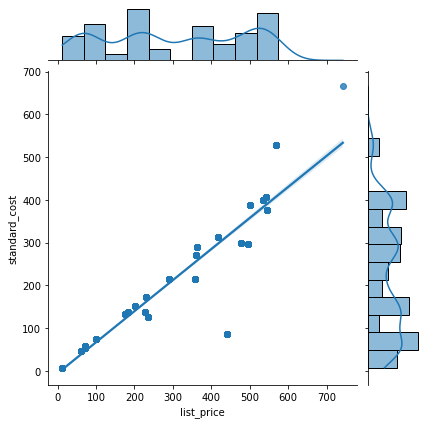

In [40]:
trans['list_price'] = pd.to_numeric(trans['list_price'],errors = 'coerce')
trans['standard_cost'] = pd.to_numeric(trans['standard_cost'],errors = 'coerce')

trans0 = trans[trans['product_id']==0]

sns.jointplot(x='list_price', y='standard_cost',
                      data=trans0,  kind="reg",
                      color=None, ratio=5,
                      dropna=True, xlim=None,
                      ylim=None)

#可以看出有明显相关性，因此fill cost的时候可以根据price计算


In [41]:
trans0 = trans0[trans0['standard_cost'].notnull()]
lm = LinearRegression()
lm.fit(trans0[['list_price']], trans0['standard_cost'])


LinearRegression()

In [42]:
beta0 = lm.intercept_
beta1 = lm.coef_[0]

In [43]:
beta0

-5.745306543207903

In [44]:
beta1

0.7263053372369931

In [45]:
# fill standard_cost
trans['standard_cost'] = trans.apply(lambda row:beta0+beta1*row['list_price'] if pd.isnull(row['standard_cost']) else row['standard_cost'], axis = 1)

In [46]:
trans.dtypes

0
transaction_id              object
product_id                  object
customer_id                 object
transaction_date            object
online_order                  bool
order_status                object
brand                       object
product_line                object
product_class               object
product_size                object
list_price                 float64
standard_cost              float64
product_first_sold_date    float64
dtype: object

In [47]:
# transaction date and first sold date需要转换为datetime
excel_epoch = pd.to_datetime('1900-01-01')
trans['product_first_sold_date'] = excel_epoch + pd.to_timedelta(trans['product_first_sold_date']-1, unit = 'D')


trans['transaction_date'] = pd.to_datetime(trans['transaction_date'])

In [48]:
#更换布尔值为online offline
trans['online_order'] = trans['online_order'].map({True:'Online', False:'Offline'})


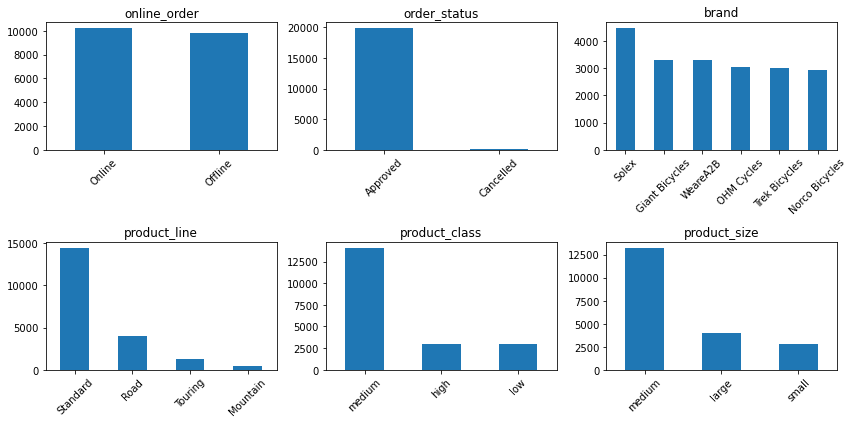

In [49]:
#查看分布
cols = ['online_order', 'order_status', 'brand', 'product_line', 'product_class', 'product_size']


fig, axes = plt.subplots(2, 3, figsize=(12, 6))

axes = axes.flatten()

for i, col in enumerate(cols):
    trans[col].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()

从histgram里可以看出来：
1. 购买得比较多的brand 是solex，比较少的是norco bicycles
2. 购买得最多的product line 是standard，购买mountain的人最少
3. 购买medium的人最多， 购买low 和high的人都比较少
4. 从product size来看，人们普遍比较喜欢medium，购买得最少的是small
5. online order比offline多
6. 成交率也比较高，cancelled的订单很少


In [50]:
trans['profit'] = trans['list_price']-trans['standard_cost']

<AxesSubplot:>

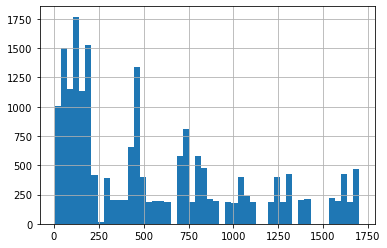

In [51]:
trans['profit'].hist(bins = 50)

# 大部分订单profit小于250

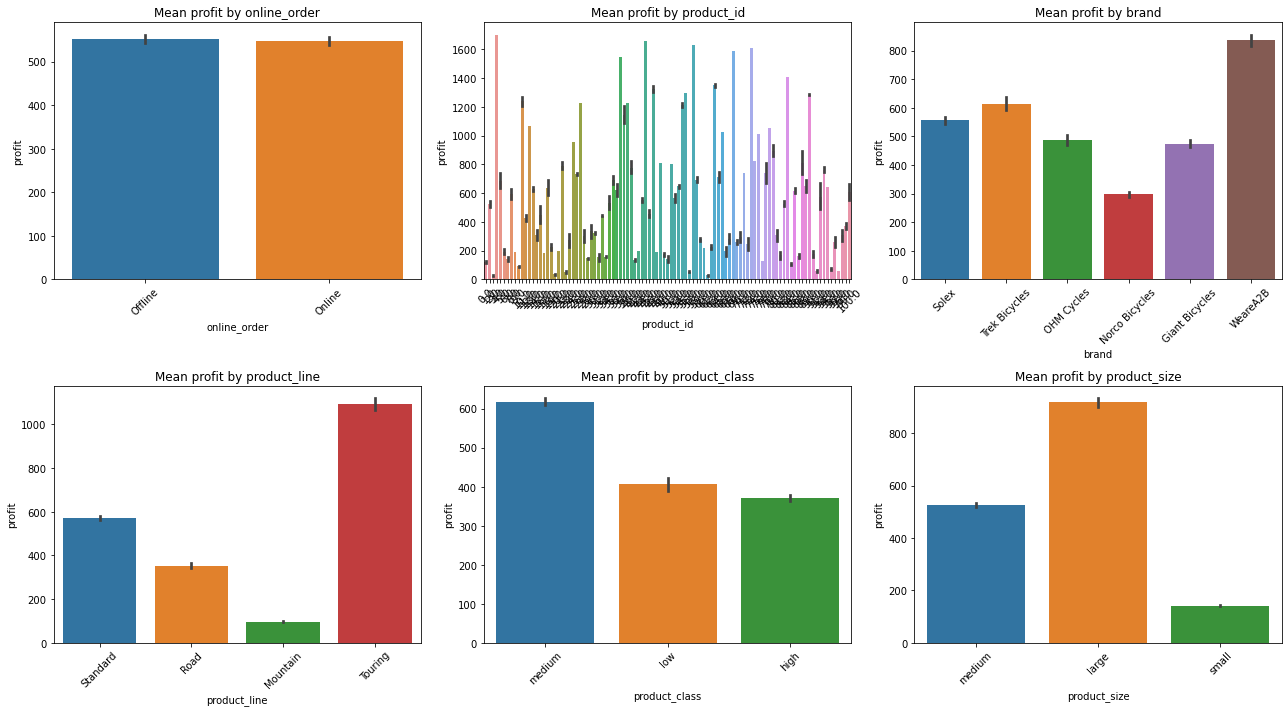

In [52]:
# 2个维度来看
l2 = ['online_order','product_id','brand','product_line','product_class','product_size']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # 将2x3数组展开成1维，方便索引

for i, col in enumerate(l2):
    sns.barplot(x=col, y='profit', data=trans, estimator=np.mean, ax=axes[i])
    axes[i].set_title(f"Mean profit by {col}")
    axes[i].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()

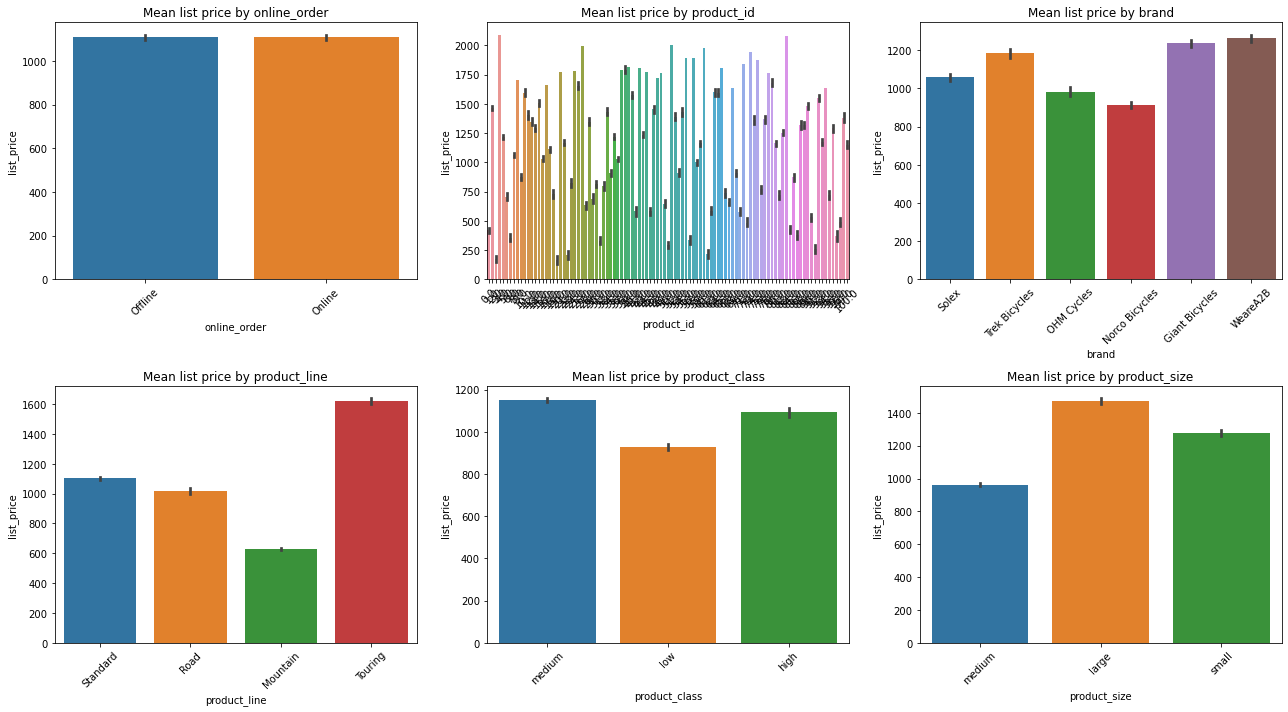

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # 将2x3数组展开成1维，方便索引

for i, col in enumerate(l2):
    sns.barplot(x=col, y='list_price', data=trans, estimator=np.mean, ax=axes[i])
    axes[i].set_title(f"Mean list price by {col}")
    axes[i].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()

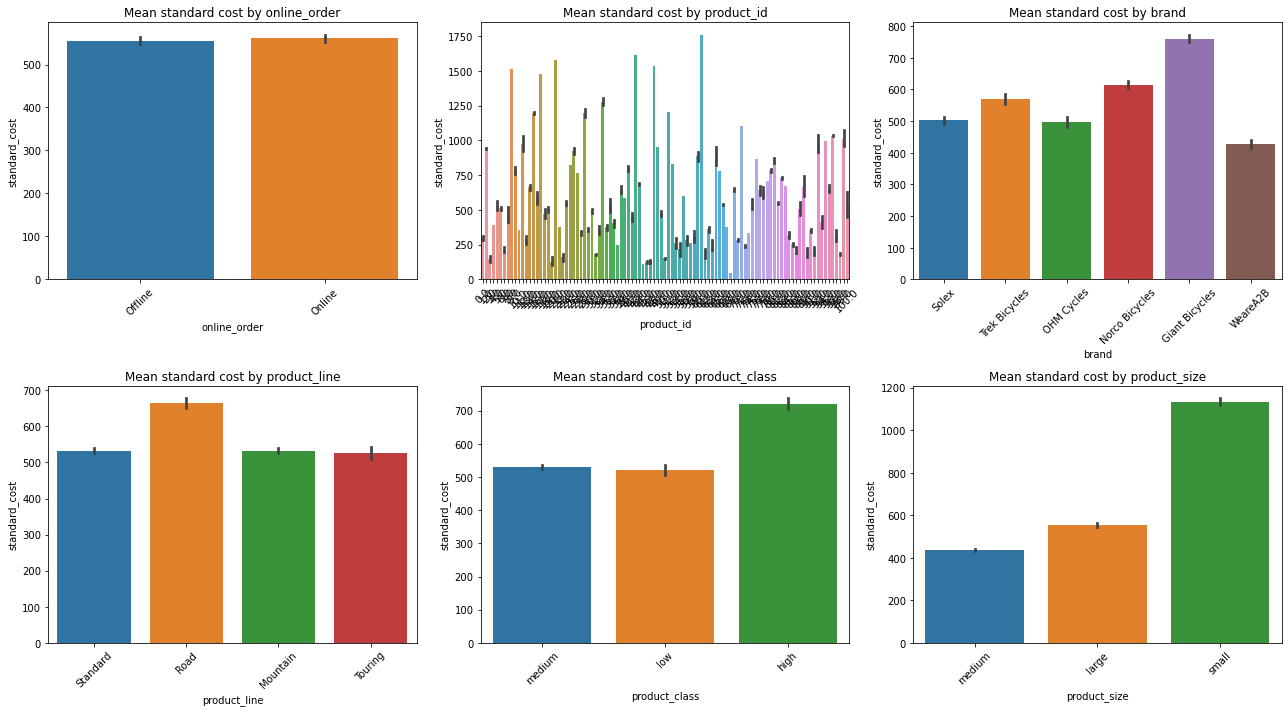

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # 将2x3数组展开成1维，方便索引

for i, col in enumerate(l2):
    sns.barplot(x=col, y='standard_cost', data=trans, estimator=np.mean, ax=axes[i])
    axes[i].set_title(f"Mean standard cost by {col}")
    axes[i].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()

从2个维度来看：
1. online/offline 利润差不多
2. WeareA2B的利润比较高，solex 和 Trek Bicycles 相对来说利润也比较不错，但 Norco Bicycles的与其他产品比起来，销售它的性价比并不高
3. 从product line来看，touring这个line的profit远远高于其他，而moutain的profit最低
4. 从product class来看， 中等的profit最高，low的较低，high class的profit最低，因此主推medium class的产品性价比最高
5.从product size来看，large的profit是最高的，但令人吃惊的是small的price高于medium的price，另外在cost上，small的cost也是惊人的高


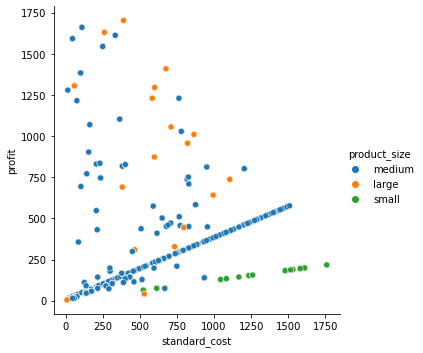

In [55]:
#3者之间的关系

sns.relplot(data=trans, x="standard_cost", y="profit", hue="product_size")

#可以更明显地看出来，large的product 相对来说price比较高一些，但cost适中，但small的product在price高的同时cost也很高

<AxesSubplot:>

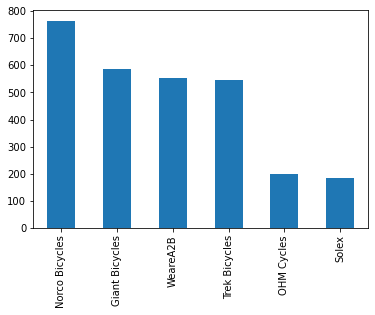

In [56]:
trans_small = trans[trans['product_size']== 'small']
trans_small['brand'].value_counts().plot(kind='bar')
#small的product里，大品牌是norco 和 giant，销售性价比最低的两个品牌

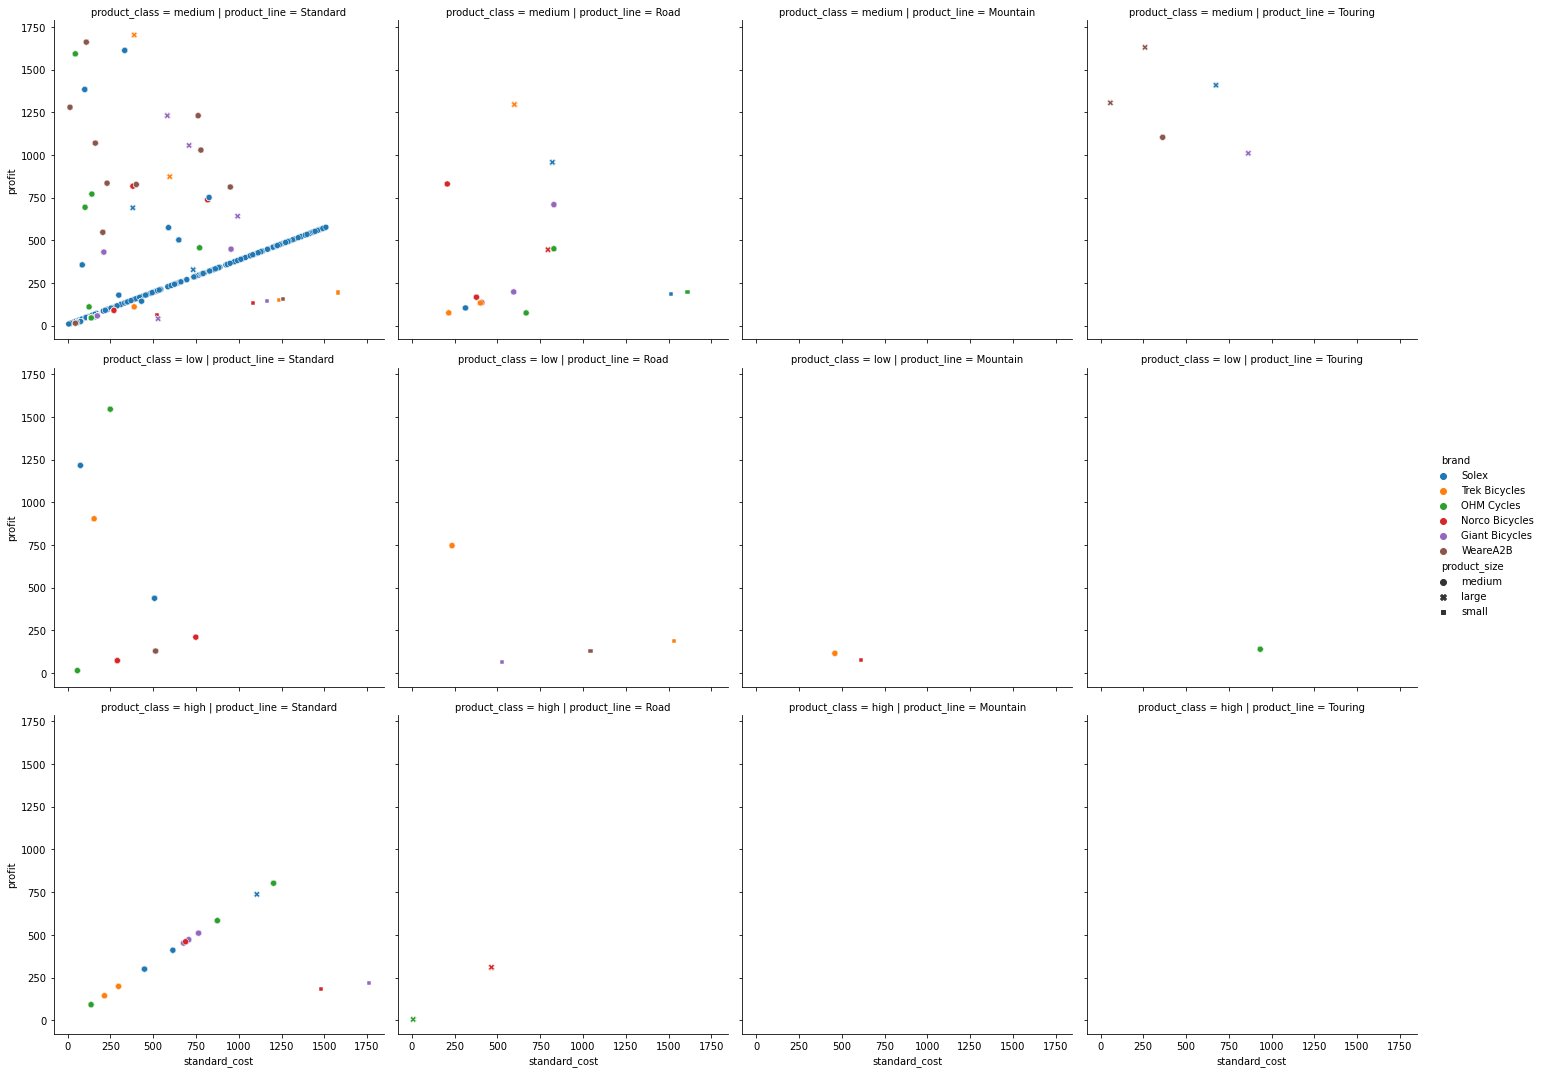

In [57]:
sns.relplot(data=trans, x="standard_cost", y="profit", hue="brand", col = 'product_line', row = 'product_class',style = 'product_size')

#可以看出来，销售最多的是medium,standard的自行车，其主要的自行车品牌为solex，
#其次是road，
# touring销售最多的是giant的bike，且利润较高，
# moutain销售最少，其品牌为T和N，且product class只有low，这也可以解释为什么moutain 的profit最低
# 中等的自行车，主要销售的productline为standard，road和touring
# high class的自行车则销售的主要是standard和road

# Table 3. cus_add

In [58]:
cus_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [59]:
cus_add.describe()

,customer_id,address,postcode,state,country,property_valuation
count,3999.0,3999,3999.0,3999,3999,3999.0
unique,3999.0,3996,873.0,5,1,12.0
top,1.0,3 Mariners Cove Terrace,2170.0,NSW,Australia,9.0
freq,1.0,2,31.0,2054,3999,647.0


In [60]:
cus_add['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [61]:
cus_add['state'] = cus_add['state'].replace('New South Wales','NSW')
cus_add['state'] = cus_add['state'].replace('Victoria','VIC')

<AxesSubplot:>

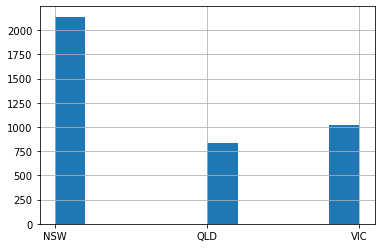

In [62]:
#查看分布
cus_add['state'].hist()

# 从分布来看，客户主要来自NSW，QLD and VIC

<AxesSubplot:>

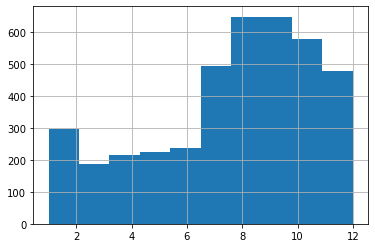

In [63]:
cus_add['property_valuation'].hist()
#most customer has property valuation from 6 to 12

In [64]:
#去掉不用的列
cus_add1 = cus_add
del cus_add1['address']
del cus_add1['postcode']
del cus_add1['country']

In [65]:
cus_add1.head()

,customer_id,state,property_valuation
0,1.0,NSW,10.0
1,2.0,NSW,10.0
2,4.0,QLD,9.0
3,5.0,NSW,4.0
4,6.0,VIC,9.0


<AxesSubplot:xlabel='state', ylabel='property_valuation'>

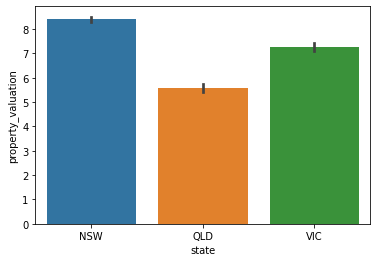

In [66]:
sns.barplot(x = 'state', y = 'property_valuation', data = cus_add1, estimator = np.mean)
#NSW的cus property高，QLD低，VIC居中

# Step 3. Join table and EDA

In [67]:
#合并table
df = pd.merge(trans, cus_demo1, on = 'customer_id', how = 'left')
df = pd.merge(df, cus_add1, on = 'customer_id', how = 'left')

In [68]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,age,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation
0,1.0,2.0,2950.0,2024-02-25,Offline,Approved,Solex,Standard,medium,medium,...,Male,19.0,69.0,Financial Services,Mass Customer,N,Yes,10.0,VIC,6.0
1,2.0,3.0,3120.0,2024-05-21,Online,Approved,Trek Bicycles,Standard,medium,large,...,Female,89.0,45.0,Health,Mass Customer,N,Yes,10.0,NSW,5.0
2,3.0,37.0,402.0,2024-10-16,Offline,Approved,OHM Cycles,Standard,low,medium,...,Male,9.0,47.0,Retail,Affluent Customer,N,No,22.0,NSW,1.0
3,4.0,88.0,3135.0,2024-08-31,Offline,Approved,Norco Bicycles,Standard,medium,medium,...,Male,83.0,62.0,Financial Services,Mass Customer,N,No,16.0,NSW,10.0
4,5.0,78.0,787.0,2024-01-10,Online,Approved,Giant Bicycles,Standard,medium,large,...,Female,29.0,28.0,Retail,Affluent Customer,N,Yes,2.0,NSW,7.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       20000 non-null  object        
 1   product_id                           20000 non-null  object        
 2   customer_id                          20000 non-null  object        
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         20000 non-null  object        
 5   order_status                         20000 non-null  object        
 6   brand                                20000 non-null  object        
 7   product_line                         20000 non-null  object        
 8   product_class                        20000 non-null  object        
 9   product_size                         20000 non-null  object        
 10  list_price

In [70]:
df.isnull().sum()

transaction_id                          0
product_id                              0
customer_id                             0
transaction_date                        0
online_order                            0
order_status                            0
brand                                   0
product_line                            0
product_class                           0
product_size                            0
list_price                              0
standard_cost                           0
product_first_sold_date                 0
profit                                  0
name                                    3
gender                                  3
past_3_years_bike_related_purchases     3
age                                     3
job_industry_category                   3
wealth_segment                          3
deceased_indicator                      3
owns_car                                3
tenure                                  3
state                             

In [71]:
#fill missing value
for col in df.columns:
    if df[col].dtypes == 'float':
        if col == 'age':
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].value_counts().index[0])
        
df.isnull().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
profit                                 0
name                                   0
gender                                 0
past_3_years_bike_related_purchases    0
age                                    0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
state                                  0
property_valuati

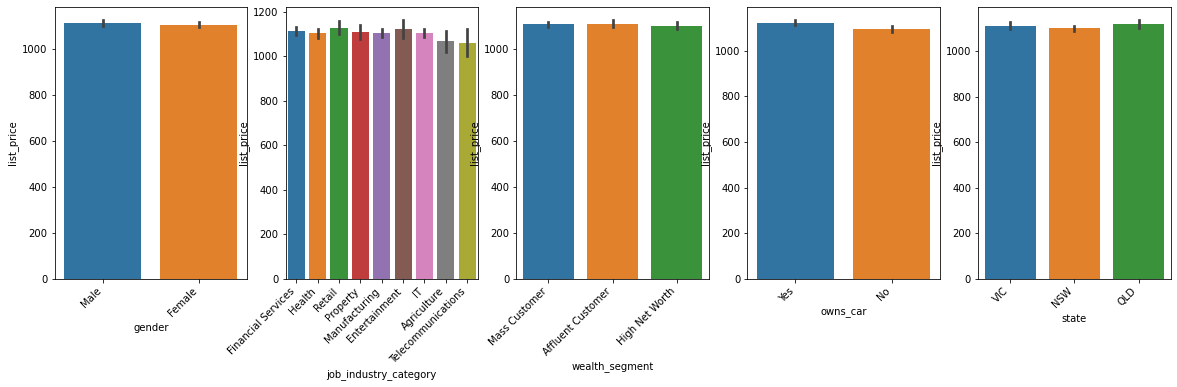

In [72]:
l3 = ['gender', 'job_industry_category', 'wealth_segment', 'owns_car','state']

fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (20,5))

for i in range(5):
    sns.barplot(x = l3[i], y = 'list_price', data = df, estimator = np.mean, ax = axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")

主要看了一下customer、地域特征与list price的关系，可以看出来：
1. 男性、女性购买力差别不多，男性略多一些
2. 并且不同wealth分类的客户的购买力均值也差不多
3. 有车的customer购买力相对没有车的客户会稍多一些
4. 从地域来看OLD的 customer 购买力少强一些，New South Wales的购买力稍弱一些，但property_valuation来看，nsw的评价较高，OLD的评分较低，说明产品对high property的客户吸引力不足，对low property的客户相对稍好

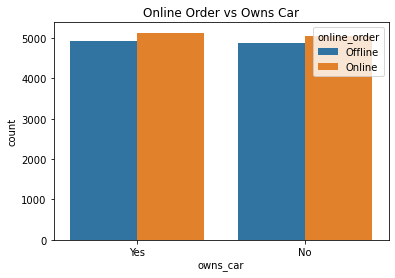

In [73]:
sns.countplot(x='owns_car', hue='online_order', data=df)
plt.title('Online Order vs Owns Car')
plt.show()

网购和是否拥有车没有太多关系

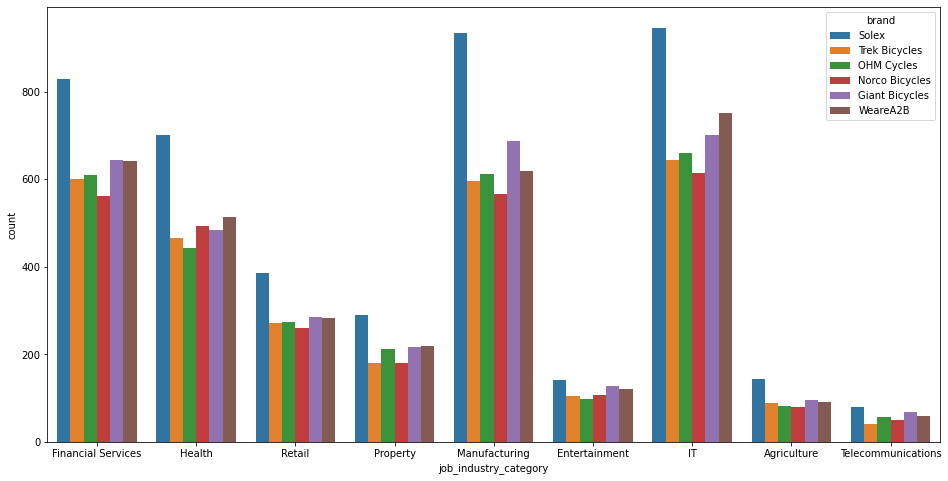

In [74]:
plt.figure(figsize = (16,8))
sns.countplot(x='job_industry_category', hue='brand', data=df)


plt.show()

可以看出来，各个职业的人对brand的偏好还是有不一样的，solex占主导，manufacture的人更偏爱giant，IT、health更喜欢WeareA2B

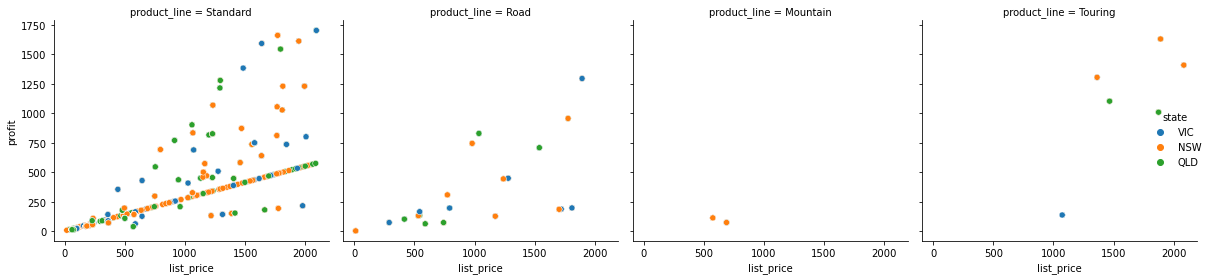

In [75]:
sns.color_palette('pastel')
ax = sns.relplot(
    data=df, kind='scatter',
    x='list_price', 
    y='profit',
    hue='state',
#     row='product_size',
    col = 'product_line',
    height=4
)

plt.tight_layout()
plt.show()

可以看出来mountain主要是NSW的人在购买

/var/folders/85/jcyy_w7d4g5cdzprsfn0tngh0000gn/T/ipykernel_10820/2407615500.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_trans = df.groupby('month')['list_price','standard_cost','profit'].mean()
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


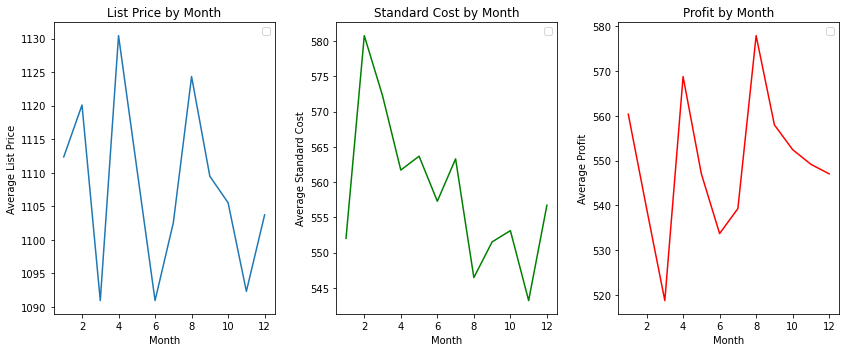

In [76]:
df['month'] = df['transaction_date'].dt.month

group_trans = df.groupby('month')['list_price','standard_cost','profit'].mean()
group_trans = group_trans.reset_index()

#visualization
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))


sns.lineplot(x ='month', y = 'list_price', data = group_trans, ax = axes[0])
axes[0].set_title('List Price by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average List Price')
axes[0].legend()


axes[1].plot(group_trans['month'], group_trans['standard_cost'], color='g')
axes[1].set_title('Standard Cost by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Standard Cost')
axes[1].legend()

axes[2].plot(group_trans['month'], group_trans['profit'], color='r')
axes[2].set_title('Profit by Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Average Profit')
axes[2].legend()


plt.tight_layout()
plt.show()

从图里面可以看出，cost从2月开始一直在往下降，list price有明显的周期性，2,4,8月卖出的list price较高，随后的3,6,11卖出的list price较低。
从成交单数来看，并没有明显的这样的周期性，但也可以看出来8月和10月产生的交易稍多一些
整体看来，price大致在一个区间里浮动，cost在下降，profit在逐步上升


<BarContainer object of 12 artists>

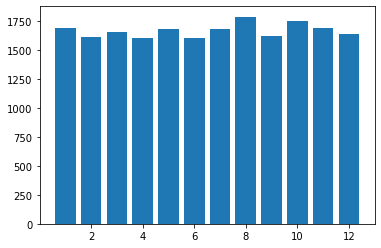

In [77]:
trans_count = df['month'].value_counts().reset_index()
trans_count.columns = ['month','count']
plt.bar(trans_count['month'], trans_count['count'])


<AxesSubplot:>

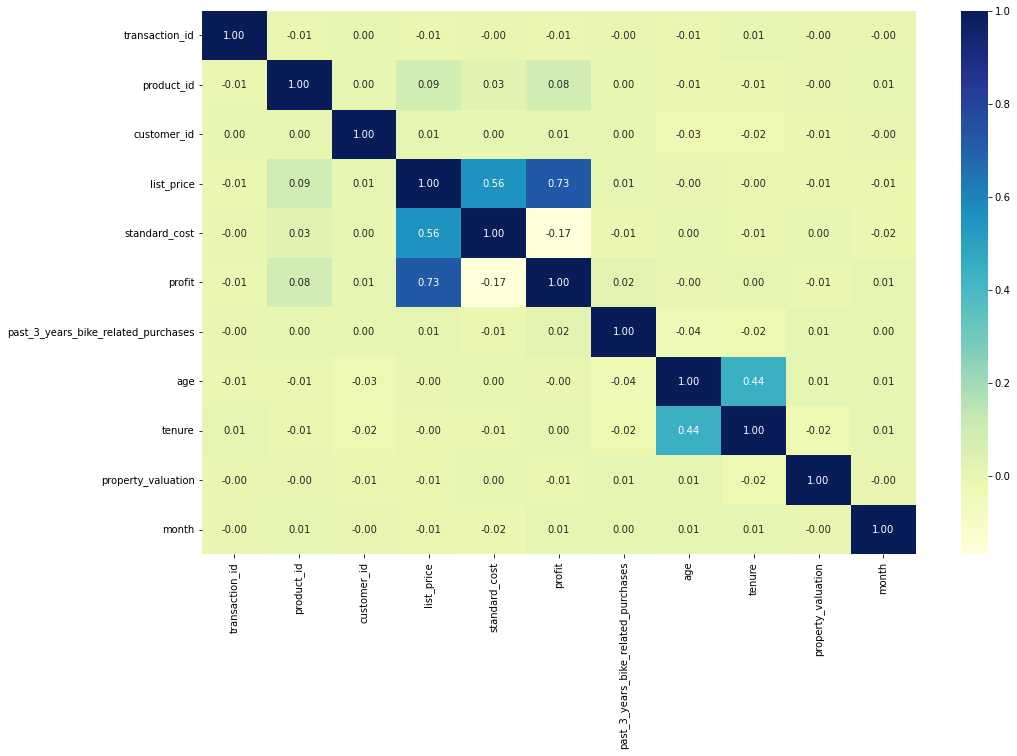

In [78]:
plt.figure(figsize = (16,10))
sns.heatmap(df[list(df.columns)].corr(), annot = True, fmt = '.2f', cmap = 'YlGnBu')

# 从图中可以看出，大部分的指标之间并没有明显的相关性
# 但list_price & standard_cost之间还是呈现出一定的相关性
# 此外tenure & age之间也有一定弱相关性

# Step 4. Cohort Analysis

In [79]:
# create cohort table for retention rate


first_trans = df.groupby('customer_id')['month'].min().reset_index()

df = pd.merge(df, first_trans, on = 'customer_id', how = 'left')
df = df.rename(columns = {
    'month_x':'trans_month',
    'month_y':'first_month'
})


In [80]:
df['cohort_index'] = df['trans_month']-df['first_month']+1
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,trans_month,first_month,cohort_index
0,1.0,2.0,2950.0,2024-02-25,Offline,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10.0,VIC,6.0,2,2,1
1,2.0,3.0,3120.0,2024-05-21,Online,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,N,Yes,10.0,NSW,5.0,5,1,5
2,3.0,37.0,402.0,2024-10-16,Offline,Approved,OHM Cycles,Standard,low,medium,...,Retail,Affluent Customer,N,No,22.0,NSW,1.0,10,1,10
3,4.0,88.0,3135.0,2024-08-31,Offline,Approved,Norco Bicycles,Standard,medium,medium,...,Financial Services,Mass Customer,N,No,16.0,NSW,10.0,8,2,7
4,5.0,78.0,787.0,2024-01-10,Online,Approved,Giant Bicycles,Standard,medium,large,...,Retail,Affluent Customer,N,Yes,2.0,NSW,7.0,1,1,1


In [81]:
# 这个地方有点迷糊

#计算留存率
cohort_group = df.groupby(['first_month','cohort_index']).nunique()['customer_id'].reset_index()
cohort_counts = cohort_group.pivot_table(index = 'first_month', columns = 'cohort_index', values = 'customer_id')

retention_rate = cohort_counts.divide(cohort_counts.iloc[:,0], axis = 0)

In [82]:
retention_rate

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
first_month,,,,,,,,,,,,
1,1.0,0.365979,0.360825,0.360825,0.366716,0.362297,0.393225,0.382180,0.359352,0.388071,0.378498,0.37187
2,1.0,0.406250,0.381250,0.403750,0.373750,0.371250,0.407500,0.385000,0.410000,0.386250,0.352500,NaN
3,1.0,0.376494,0.364542,0.384462,0.376494,0.432271,0.390438,0.374502,0.392430,0.416335,NaN,NaN
4,1.0,0.337705,0.363934,0.422951,0.390164,0.324590,0.426230,0.422951,0.426230,NaN,NaN,NaN
5,1.0,0.383886,0.412322,0.398104,0.369668,0.421801,0.312796,0.383886,NaN,NaN,NaN,NaN
6,1.0,0.324561,0.403509,0.429825,0.333333,0.403509,0.377193,NaN,NaN,NaN,NaN,NaN
7,1.0,0.525000,0.287500,0.375000,0.437500,0.325000,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,0.333333,0.351852,0.407407,0.259259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,0.352941,0.264706,0.470588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Rentention Rate'}, xlabel='cohort_index', ylabel='first_month'>

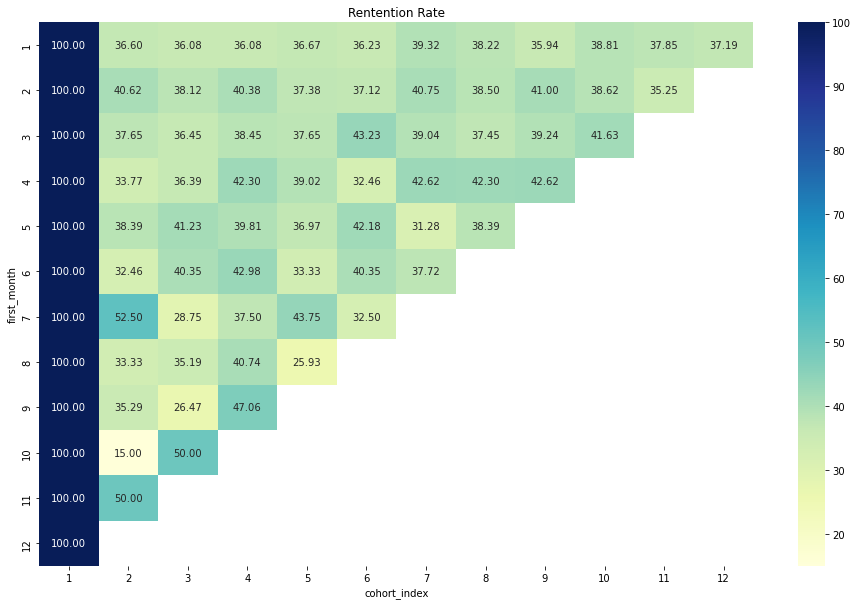

In [83]:
plt.figure(figsize=(16, 10))
plt.title('Rentention Rate')
sns.heatmap(retention_rate*100, annot=True, fmt=".2f", cmap = 'YlGnBu')

从留存率来看，7月产生的新用户在8月的留存率很高，但10月新产生的用户在11月的留存率很低，原因有待考察。

9、10、11月产生的新用户在12月的留存率也较高，可能是受到圣诞、新年等节日的影响

In [84]:
df_7 = df[(df['first_month'] == 7) & (df['trans_month'] == 8)].copy()
df_7['retention'] = 'high retention'

df_10 = df[(df['first_month'] == 10) & (df['trans_month'] == 11)].copy()
df_10['retention'] = 'low retention'


df_7_10 = pd.concat([df_7, df_10], ignore_index=True)

In [85]:
df_7_10 = df_7_10.drop(columns=[
    'transaction_id', 
    'product_id', 
    'transaction_date', 
    'trans_month', 
    'first_month', 
    'cohort_index',
    'product_first_sold_date'
])


In [86]:
df_7_10.head()

,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,...,past_3_years_bike_related_purchases,age,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,retention
0,1516.0,Offline,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1592.19,...,6.0,57.0,IT,Affluent Customer,N,No,19.0,NSW,10.0,high retention
1,2302.0,Online,Approved,Trek Bicycles,Standard,low,medium,1057.51,154.40,903.11,...,43.0,25.0,Retail,Mass Customer,N,Yes,4.0,VIC,8.0,high retention
2,1411.0,Offline,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,114.93,...,24.0,30.0,Health,Mass Customer,N,Yes,5.0,NSW,7.0,high retention
3,3474.0,Online,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,133.38,...,93.0,45.0,Manufacturing,Mass Customer,N,No,14.0,QLD,1.0,high retention
4,16.0,Offline,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,...,38.0,47.0,IT,Mass Customer,N,Yes,18.0,VIC,4.0,high retention


In [87]:
df_7_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          57 non-null     float64
 1   online_order                         57 non-null     object 
 2   order_status                         57 non-null     object 
 3   brand                                57 non-null     object 
 4   product_line                         57 non-null     object 
 5   product_class                        57 non-null     object 
 6   product_size                         57 non-null     object 
 7   list_price                           57 non-null     float64
 8   standard_cost                        57 non-null     float64
 9   profit                               57 non-null     float64
 10  name                                 57 non-null     object 
 11  gender                            

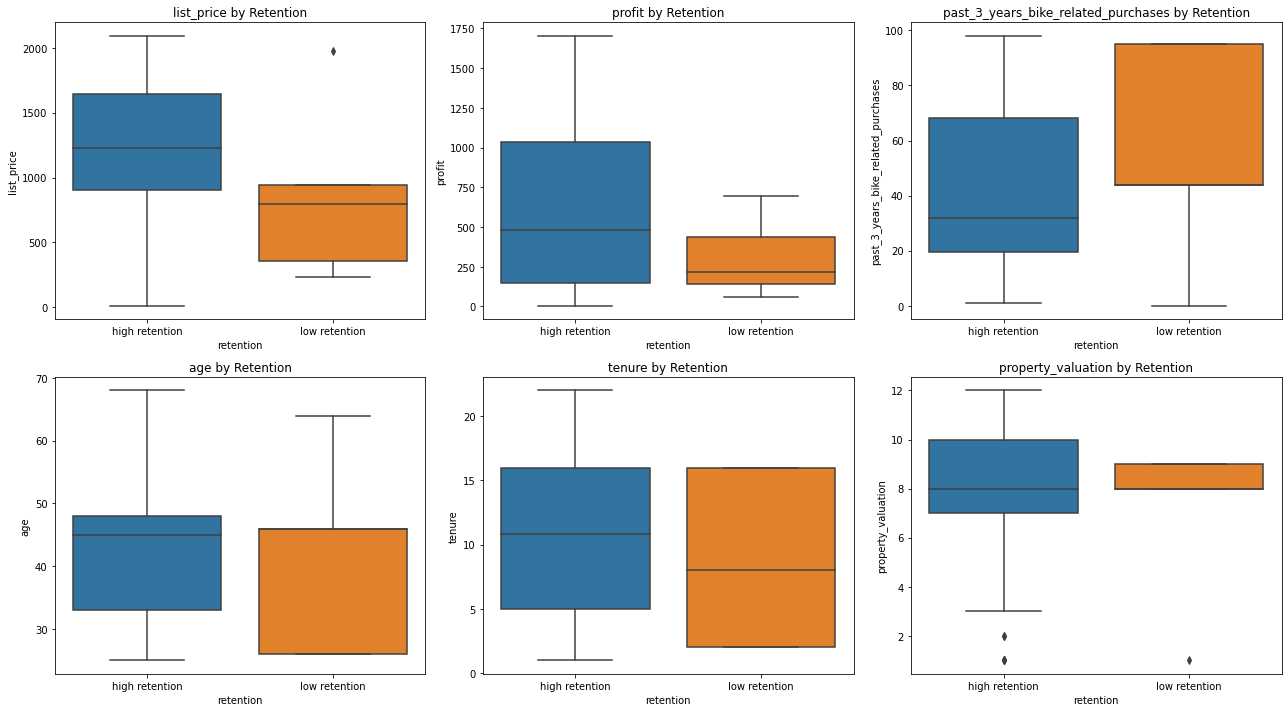

In [88]:
cols = ['list_price', 'profit', 'past_3_years_bike_related_purchases','age', 'tenure', 'property_valuation']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x='retention', y=col, data=df_7_10, ax=axes[i])
    axes[i].set_title(f'{col} by Retention')

plt.tight_layout()
plt.show()

#高留存率的时候，客单价比较高，利润也较高，年龄更多元化，tenure也更多元化且相对较高，property valuation也更多元化

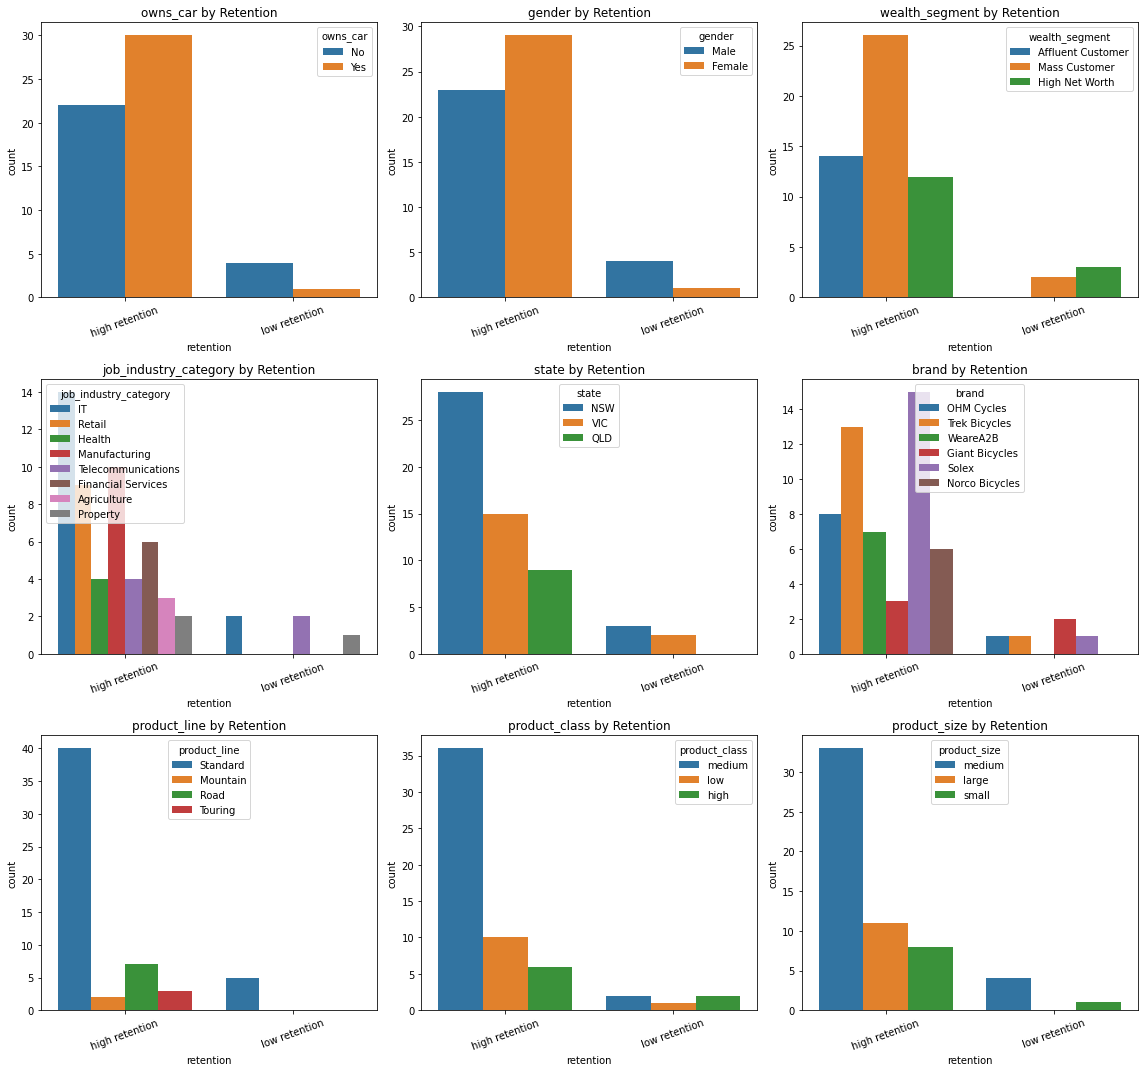

In [89]:
cat_vars = ['owns_car', 'gender', 'wealth_segment', 'job_industry_category', 'state', 'brand','product_line','product_class','product_size']

n = len(cat_vars)
ncols = 3
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(cat_vars):
    sns.countplot(x='retention', hue=col, data=df_7_10, ax=axes[i])
    axes[i].set_title(f'{col} by Retention')
    axes[i].tick_params(axis='x', rotation=20)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#高留存的时候，有车的女客户更多，而低留存的那次，有车的女客户非常少
#留存高的那次主要是留下了mass customer，部分affluent客户，high net较少，而低留存那次没有affluent，high net多余mass
#high留存主要是IT，manufa， 低留存则主要留下的是tele communications, property
# high留存主要是NSW的客户，低留存完全没有QLD的客户
# high留存主要卖出的是solex和t，低留存则主要是giant

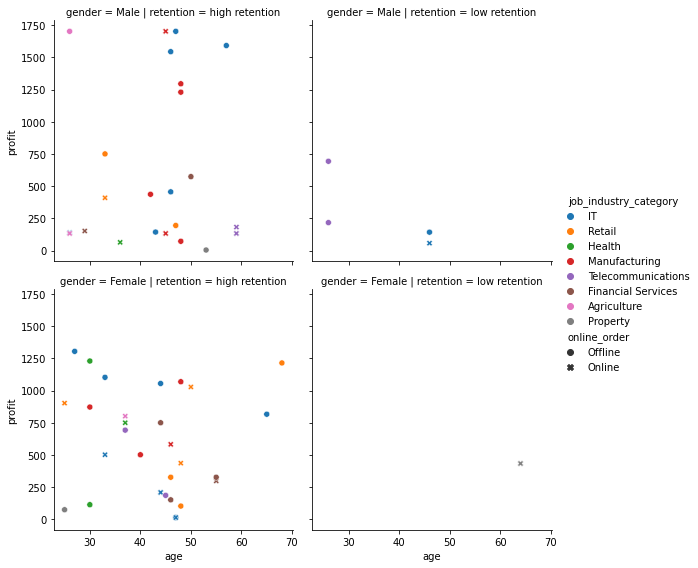

In [90]:
sns.color_palette('pastel')
ax = sns.relplot(data = df_7_10, x = 'age', y = 'profit',
                 hue = 'job_industry_category', 
                 col = 'retention', 
                 row = 'gender',
                 style = 'online_order',
                 height = 4)
plt.show()

看起来，高留存中，男性更会买一些，高profit的产品，且主要为制造业和it男性，低留存中，主要是tele和IT的男性，但都买的是低profit的产品


通过segmentation，我们发现，这次留存率高，主要增加的是一些线下购买，有车的女性用户
职业以IT，制造业为主
地区以NSW为主
主要购买的是solex,tirex,主要是standard line，medium class，medium size。
留存率低的那一次，价格较高，因此相对高净值客户反而比其他客户留存率高。

# Step 5. RFM Modle

In [91]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,trans_month,first_month,cohort_index
0,1.0,2.0,2950.0,2024-02-25,Offline,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10.0,VIC,6.0,2,2,1
1,2.0,3.0,3120.0,2024-05-21,Online,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,N,Yes,10.0,NSW,5.0,5,1,5
2,3.0,37.0,402.0,2024-10-16,Offline,Approved,OHM Cycles,Standard,low,medium,...,Retail,Affluent Customer,N,No,22.0,NSW,1.0,10,1,10
3,4.0,88.0,3135.0,2024-08-31,Offline,Approved,Norco Bicycles,Standard,medium,medium,...,Financial Services,Mass Customer,N,No,16.0,NSW,10.0,8,2,7
4,5.0,78.0,787.0,2024-01-10,Online,Approved,Giant Bicycles,Standard,medium,large,...,Retail,Affluent Customer,N,Yes,2.0,NSW,7.0,1,1,1


In [92]:
# 计算R（最近一次购买时间）
rfm = df.groupby('customer_id')['transaction_date'].max().reset_index()
rfm['transaction_date'] = pd.to_datetime('2024-12-31') - rfm['transaction_date']

# 计算F（购买频率）
freq = df.groupby('customer_id')['transaction_id'].count().reset_index()
rfm = rfm.merge(freq, on = 'customer_id', how = 'inner')

# 计算M（消费金额）
df['profit'] = df['list_price'] - df['standard_cost']
bill = df.groupby('customer_id')['profit'].sum().reset_index()
rfm = rfm.merge(bill, on = 'customer_id', how = 'inner')

rfm = rfm.rename(columns = {
    'transaction_date':'recency',
    'transaction_id':'frequency',
    'profit':'monetary'
})


In [93]:
# qcut分位数
rfm['r_score'] = pd.qcut(rfm['recency'], 5, labels = range(5,0,-1))
rfm['f_score'] = pd.qcut(rfm['frequency'], 5, labels = range(1,6))
rfm['m_score'] = pd.qcut(rfm['monetary'], 5, labels = range(1,6))



In [94]:
def assign_customer_label(row):
    if (row['r_score'] >= 4) & (row['f_score'] >= 4) & (row['m_score'] >= 4):
        return 'Potential Customer'
    elif (row['r_score'] >= 3) & (row['f_score'] >= 3) & (row['m_score'] >= 3):
        return 'High-Value Customer'
    elif row['r_score'] < 2:
        return 'At-Risk Customer'
    elif row['f_score'] < 2:
        return 'Low-Frequency Customer'
    else:
        return 'Regular Customer'
    
rfm['customer_label'] = rfm.apply(assign_customer_label, axis = 1)

In [95]:
rfm

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,customer_label
0,1.0,8 days,11,3018.090000,5,5,3,High-Value Customer
1,2.0,55 days,3,2226.260000,3,1,2,Low-Frequency Customer
2,3.0,103 days,8,3362.810000,1,4,3,At-Risk Customer
3,4.0,196 days,2,220.570000,1,1,1,At-Risk Customer
4,5.0,17 days,6,2394.940000,4,3,2,Regular Customer
...,...,...,...,...,...,...,...,...
3489,3497.0,22 days,3,1648.320000,4,1,2,Low-Frequency Customer
3490,3498.0,90 days,6,3147.330000,2,3,3,Regular Customer
3491,3499.0,30 days,7,4955.250000,4,4,5,Potential Customer
3492,3500.0,60 days,6,1785.860000,2,3,2,Regular Customer


In [96]:
df = df.merge(rfm, on = 'customer_id', how = 'left')

In [97]:
df_label = df[['customer_id','online_order', 'brand', 'product_line', 'product_class', 'product_size',  'gender', 'age', 'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'state', 'property_valuation','first_month','trans_month', 'profit', 'customer_label']]

In [98]:
df_label.head()

,customer_id,online_order,brand,product_line,product_class,product_size,gender,age,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,first_month,trans_month,profit,customer_label
0,2950.0,Offline,Solex,Standard,medium,medium,Male,69.0,Financial Services,Mass Customer,Yes,10.0,VIC,6.0,2,2,17.87,Low-Frequency Customer
1,3120.0,Online,Trek Bicycles,Standard,medium,large,Female,45.0,Health,Mass Customer,Yes,10.0,NSW,5.0,1,5,1702.55,Regular Customer
2,402.0,Offline,OHM Cycles,Standard,low,medium,Male,47.0,Retail,Affluent Customer,No,22.0,NSW,1.0,1,10,1544.61,Regular Customer
3,3135.0,Offline,Norco Bicycles,Standard,medium,medium,Male,62.0,Financial Services,Mass Customer,No,16.0,NSW,10.0,2,8,817.36,At-Risk Customer
4,787.0,Online,Giant Bicycles,Standard,medium,large,Female,28.0,Retail,Affluent Customer,Yes,2.0,NSW,7.0,1,1,1055.82,Regular Customer


<AxesSubplot:>

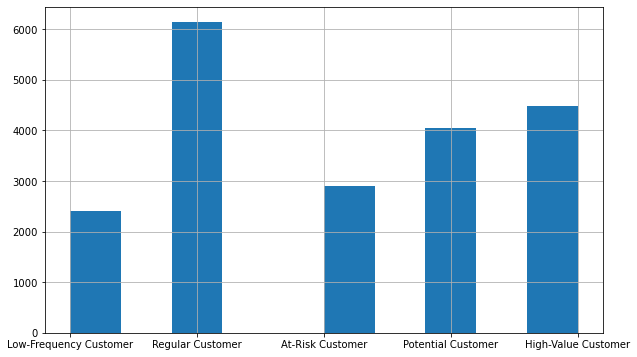

In [99]:
plt.figure(figsize=(10, 6))
df_label['customer_label'].hist()

#可以看出来，一般客户居多，其次是高价值客户

<AxesSubplot:xlabel='trans_month', ylabel='count'>

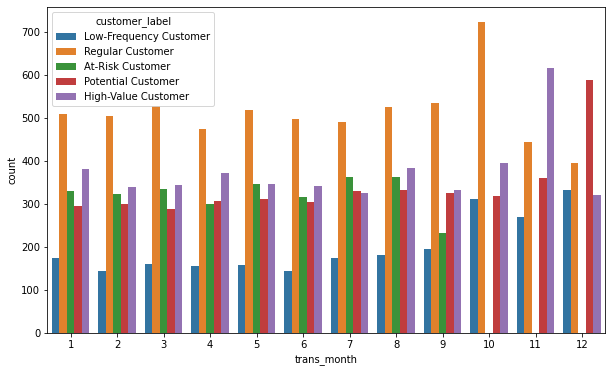

In [100]:
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_month', hue='customer_label', data=df_label)

#可以看出来，11月高价值客户的订单比较多、12月增加了很多潜在客户的订单
#low-freq customer的订单数量是在逐渐上升的，所以是好的
#风险客户的订单在10、11、12月骤降


<AxesSubplot:xlabel='customer_label', ylabel='profit'>

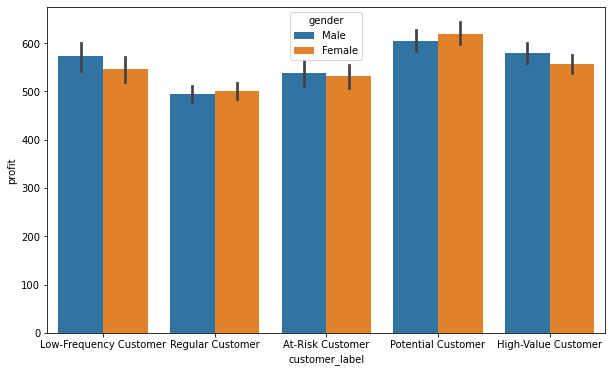

In [101]:
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_label', y='profit', hue = 'gender', data=df_label, estimator=np.mean)


In [102]:
df_label2 = rfm.merge(cus_demo1, on = 'customer_id', how = 'left')

<AxesSubplot:xlabel='customer_label', ylabel='count'>

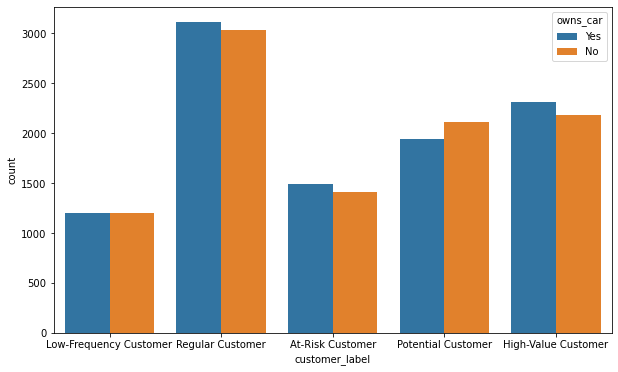

In [103]:
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_label', hue='owns_car', data=df_label)

#这个可以看出来，我们的高价值用户以有车的居多，而潜在的customer以没有车居多，因此可以增加网络购物？将potential cus转化为high-value cus

In [104]:
df_re_label = df_7_10.merge(rfm, on = 'customer_id', how = 'left')

In [105]:
df_re_label.head()

,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,...,state,property_valuation,retention,recency,frequency,monetary,r_score,f_score,m_score,customer_label
0,1516.0,Offline,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1592.19,...,NSW,10.0,high retention,38 days,5,4256.32,3,2,4,Regular Customer
1,2302.0,Online,Approved,Trek Bicycles,Standard,low,medium,1057.51,154.40,903.11,...,VIC,8.0,high retention,69 days,3,2611.15,2,1,3,Low-Frequency Customer
2,1411.0,Offline,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,114.93,...,NSW,7.0,high retention,36 days,6,4268.32,3,3,4,High-Value Customer
3,3474.0,Online,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,133.38,...,QLD,1.0,high retention,72 days,5,2358.99,2,2,2,Regular Customer
4,16.0,Offline,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,...,VIC,4.0,high retention,29 days,5,4521.84,4,2,4,Regular Customer


<AxesSubplot:xlabel='retention', ylabel='count'>

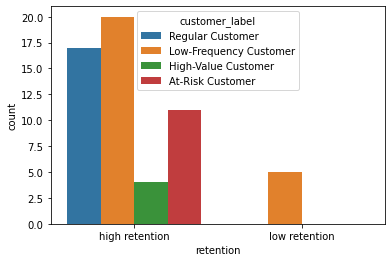

In [106]:
sns.countplot(x = 'retention', hue = 'customer_label', data = df_re_label)

看起来，在留存率低的时候，流失掉的主要是regular customer, high_value以及at-rist customer
如何把他们找回来？

In [107]:
df_target = df_re_label[df_re_label['customer_label'].isin(['Regular Customer', 'High-Value Customer', 'At-Risk Customer'])]

In [108]:
df_target.head()

,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,...,state,property_valuation,retention,recency,frequency,monetary,r_score,f_score,m_score,customer_label
0,1516.0,Offline,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1592.19,...,NSW,10.0,high retention,38 days,5,4256.32,3,2,4,Regular Customer
2,1411.0,Offline,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,114.93,...,NSW,7.0,high retention,36 days,6,4268.32,3,3,4,High-Value Customer
3,3474.0,Online,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,133.38,...,QLD,1.0,high retention,72 days,5,2358.99,2,2,2,Regular Customer
4,16.0,Offline,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,...,VIC,4.0,high retention,29 days,5,4521.84,4,2,4,Regular Customer
5,36.0,Offline,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,15.08,...,NSW,8.0,high retention,149 days,2,204.36,1,1,1,At-Risk Customer


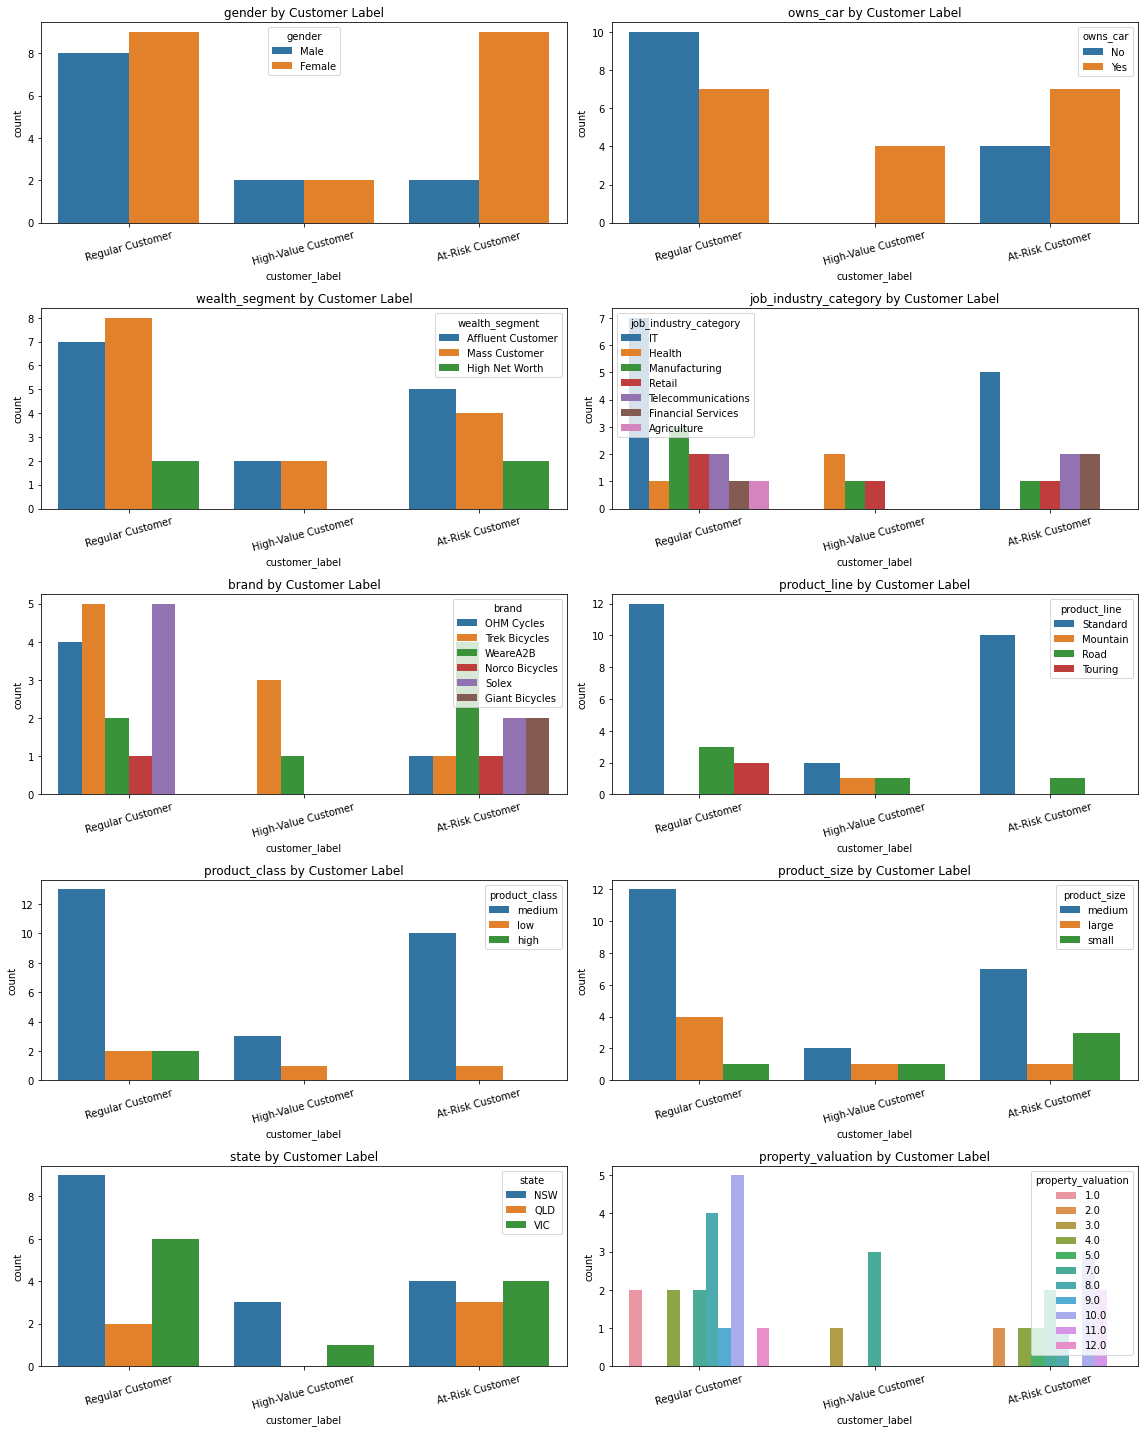

In [109]:
cat_cols = ['gender', 'owns_car', 'wealth_segment', 'job_industry_category','brand','product_line','product_class','product_size','state','property_valuation']

n = len(cat_cols)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 20))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x='customer_label', hue=col, data=df_target, ax=axes[i])
    axes[i].set_title(f'{col} by Customer Label')
    axes[i].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

比如可以去at-risk女性客户，以及从事IT的的人群下手
也可以出一下关于standard line, medium, solex的产品的活动